# Initialization 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import mean
from timeit import default_timer as timer
from math import sqrt, exp
from random import shuffle, random, randint
from google.colab import files

In [0]:
# Download the "Coors_140.csv" from the GitHub repository and upload it
uploaded = files.upload()

In [0]:
coors = pd.read_csv("Coors_140.csv") 
coords = coors.to_numpy()
coords = np.delete(coords, 0,1)
amount_of_coordinates = 20
Coordinates = coords[:amount_of_coordinates]

#Plotting
plt.scatter(Coordinates[0][1], Coordinates[0][2], c='r', marker='D')
plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

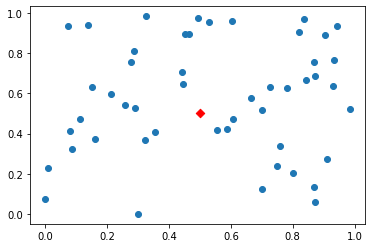

In [20]:
# If you prefer to generate the coordinates follow this:
nodes = 50
Coordinates = np.ones((nodes, 3))
Coordinates[0] = 1, 0.5, 0.5

for i in range(1, nodes):
  Coordinates[i] = int(i+1), random(), random()

#Plotting
plt.scatter(Coordinates[0][1], Coordinates[0][2], c='r', marker='D')
plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

# Distance Matrix

In [0]:
def Distance(x1, y1, x2, y2):
    return sqrt((x1-x2)**2+(y1-y2)**2)

#Creating Distance Matrix
length = len(Coordinates)
Distance_Matrix = np.zeros((length, length))
for i in range(length):
  for j in range(length):
    Distance_Matrix[i][j] = Distance(Coordinates[i][1],  Coordinates[i][2], Coordinates[j][1], Coordinates[j][2])

# Functions

In [0]:
def Plotting(tour, coords):
    n=len(tour)
    longitude=[]
    latitude=[]
    
    for i in range(n):
            longitude.append(coords[tour[i]-1, 1])
            latitude.append(coords[tour[i]-1, 2])
    plt.figure()    
    plt.plot([longitude[i] for i in range(n)],
              [latitude[i] for i in range(n)],'-.', color='cornflowerblue')
    plt.scatter(Coordinates[0][1], Coordinates[0][2], c = 'r', marker='D')
    plt.scatter(Coordinates[1:,1], Coordinates[1:,2])

In [0]:
def FindCurrentCost(CurTour):
    temporaryDis=0
    for i in range(len(CurTour)-1):    
       temporaryDis += Distance_Matrix[CurTour[i]-1,CurTour[i+1]-1]
    return temporaryDis 

# Greedy


Greedy Tour: [1, 46, 7, 29, 3, 27, 33, 25, 22, 23, 42, 21, 47, 12, 39, 28, 4, 9, 6, 34, 14, 17, 48, 30, 5, 10, 16, 45, 40, 20, 35, 31, 11, 36, 8, 18, 41, 19, 2, 43, 44, 13, 24, 26, 32, 15, 50, 38, 49, 37, 1]
Greedy Tour cost: 7.119
Calculation Time: 0.0038 sec


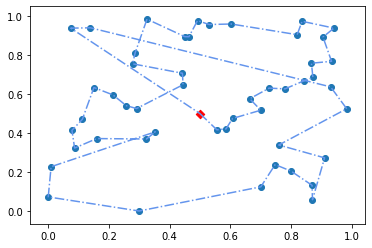

In [23]:
start = timer()
n = len(Coordinates)
dis=np.full((n,n),float(9999999))
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        else:
            dis[i,j]=Distance_Matrix[i][j]

dis[:,0]=9999999

Greedy_Tour=[1]
i=0
counter=0

while True:
  idx=np.where(dis == min(dis[i,:]))
  if len(idx[1]) == 1:
      Greedy_Tour.append(int(idx[1]+1))
      dis[:,int(idx[1])]=9999999
      i=int(idx[1])
  else:
      Greedy_Tour.append(int(idx[1][0]+1))
      dis[:,int(idx[0][1])]=9999999
      i=int(idx[0][1])
  del idx
  
  counter+=1
  if counter == n-1:
      break

Greedy_Tour.append(1)
Greedy_Tour_Cost = FindCurrentCost(Greedy_Tour)
end = timer() 

print("Greedy Tour:",Greedy_Tour)
print("Greedy Tour cost:","{0:.3f}".format(round(Greedy_Tour_Cost,3)))
print("Calculation Time:","{0:.4f}".format(round((end - start),4)), "sec")
Plotting(Greedy_Tour, Coordinates)